Ana Karen Zetter Márquez
A01637124

# Classification (supervised learning)

The notebook aims to study and implement classification (supervised learning) using "sklearn". The iris dataset will be used to classify.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [1008]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

# Importing data

In [1009]:
# Define the col names for the iris dataset
colnames = ["Sepal_Length", "Sepal_Width","Petal_Length","Petal_Width", "Flower"]

# Dataset url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Load the dataset from HHDD
df  = pd.read_csv(url, header = None, names = colnames )

df


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [1010]:
# Print dataset
print(df)

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width          Flower
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [1011]:
# Print dataset shape
print(df.shape)

(150, 5)


In [1012]:
# Print column names
print(df.columns)

Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Flower'], dtype='object')


2. Drop rows with any missing values


In [1013]:
#Drop na
df.dropna(inplace=True)
df

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


3. Encoding the class label categorical column: from string to num


In [1014]:
# Encoding the categorical column: {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
df['Flower'] = df['Flower'].replace({"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2})

#Visualize the dataset
df

<ipython-input-1014-d181992a9604>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Flower'] = df['Flower'].replace({"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2})


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Now the label/category is numeric


4. Discard columns that won't be used


In [1015]:
# Drop out non necesary columns
df2 = df.drop('Flower', axis=1)
df2

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


5. Scatter plot of the data

In [1016]:
# Scatter plot of Petal_Length vs

<Axes: xlabel='Petal_Length', ylabel='Sepal_Length'>

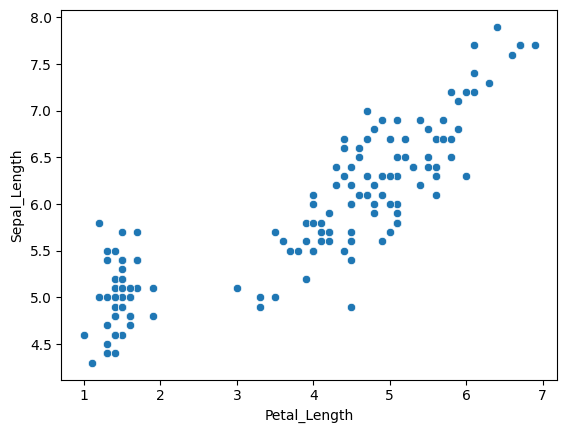

In [1017]:
# Scatter plot of Petal_Length vs Sepal_Length
sns.scatterplot(data=df2, x='Petal_Length', y='Sepal_Length')

<Axes: xlabel='Petal_Length', ylabel='Sepal_Width'>

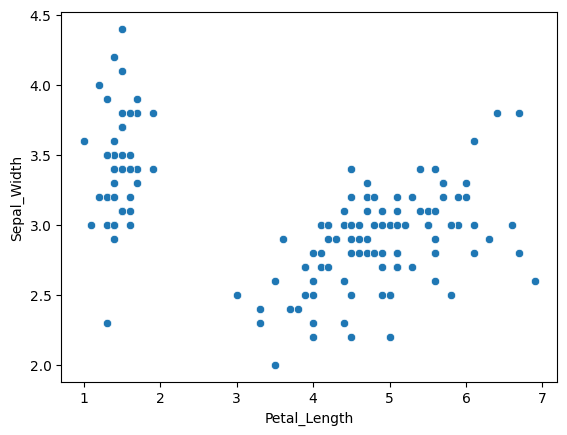

In [1018]:
# Scatter plot of Petal_Length vs Sepal_Width
sns.scatterplot(data=df2, x='Petal_Length', y='Sepal_Width')

<Axes: xlabel='Petal_Width', ylabel='Sepal_Length'>

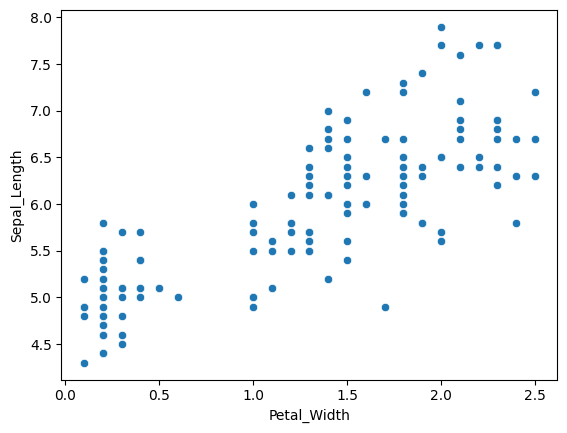

In [1019]:
# Scatter plot of Petal_Width vs Sepal_Length
sns.scatterplot(data=df2, x='Petal_Width', y='Sepal_Length')

<Axes: xlabel='Petal_Width', ylabel='Sepal_Width'>

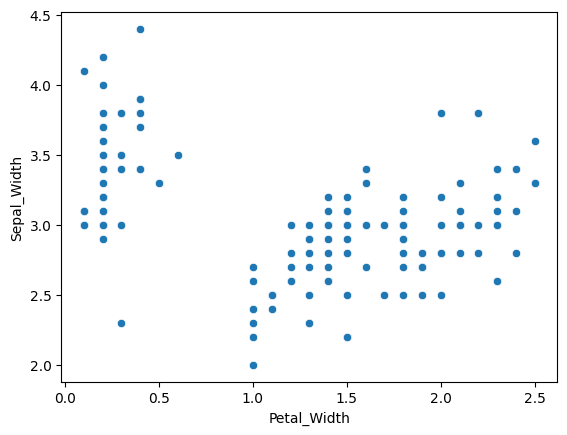

In [1020]:
# Scatter plot of Petal_Width vs Sepal_Width
sns.scatterplot(data=df2, x='Petal_Width', y='Sepal_Width')

<Axes: xlabel='Sepal_Length', ylabel='Sepal_Width'>

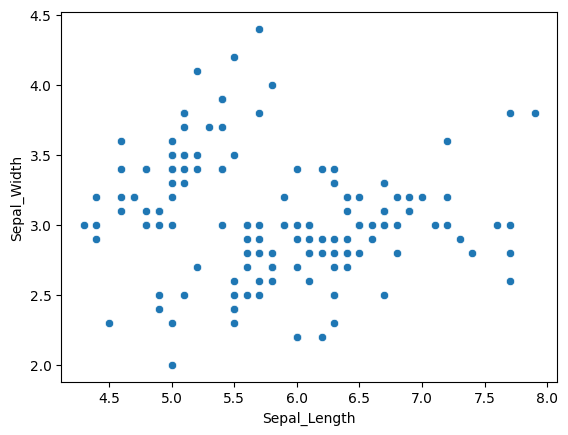

In [1021]:
# Scatter plot of Sepal_Length vs Sepal_Width
sns.scatterplot(data=df2, x='Sepal_Length', y='Sepal_Width')

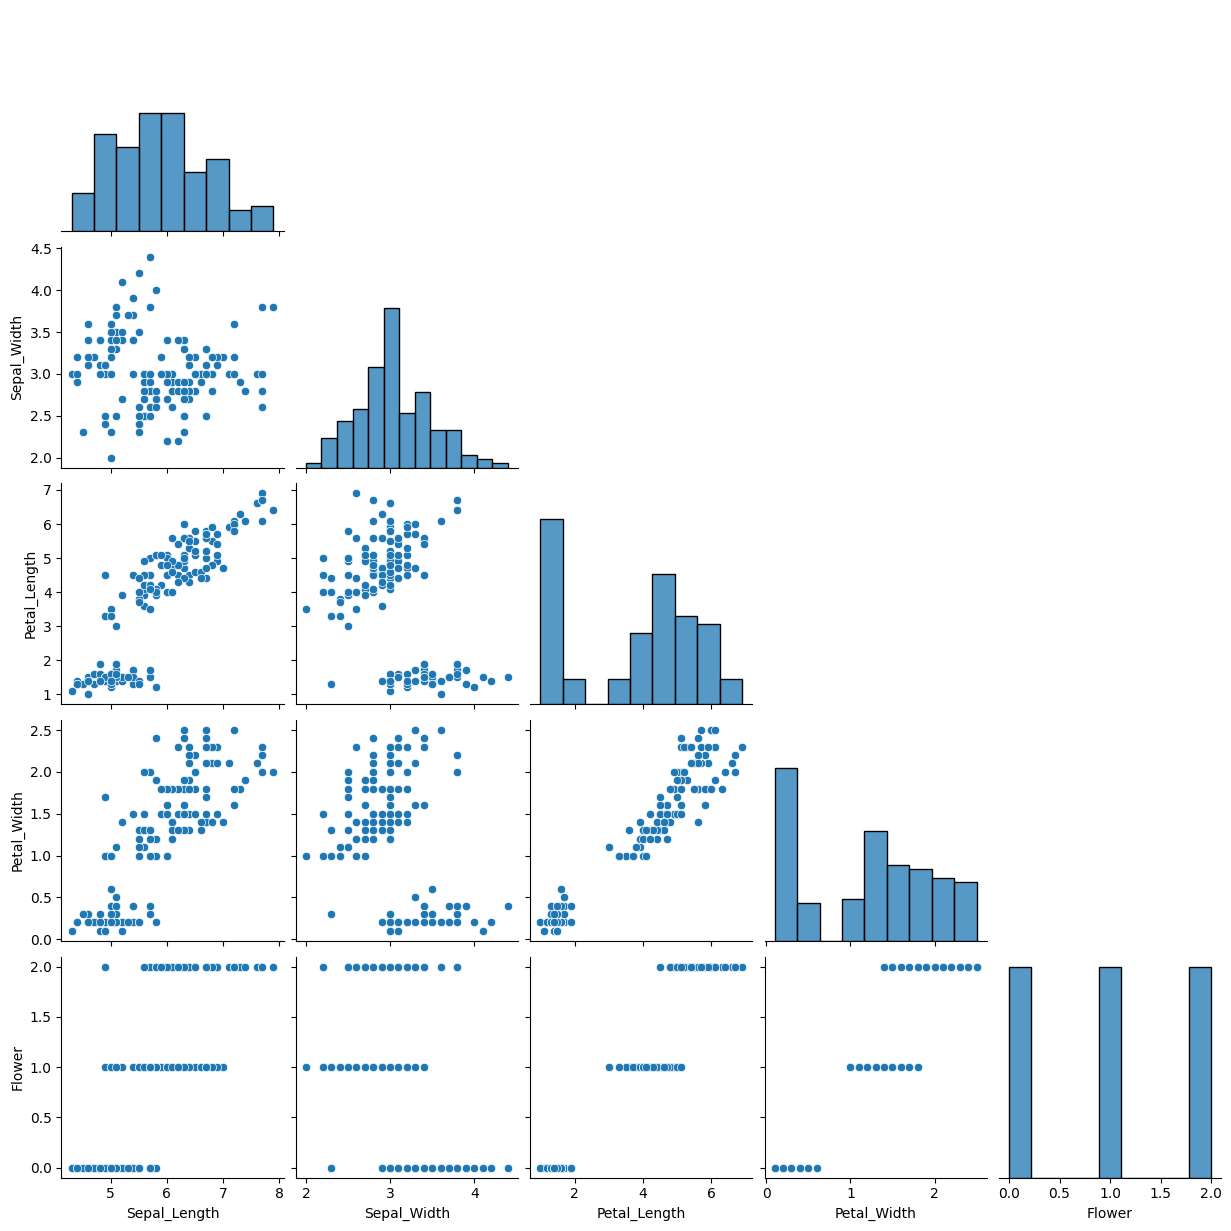

In [1022]:
# Pairplot: Scatterplot of all variables (not the flower type)
sns.pairplot(df,corner=True)

6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

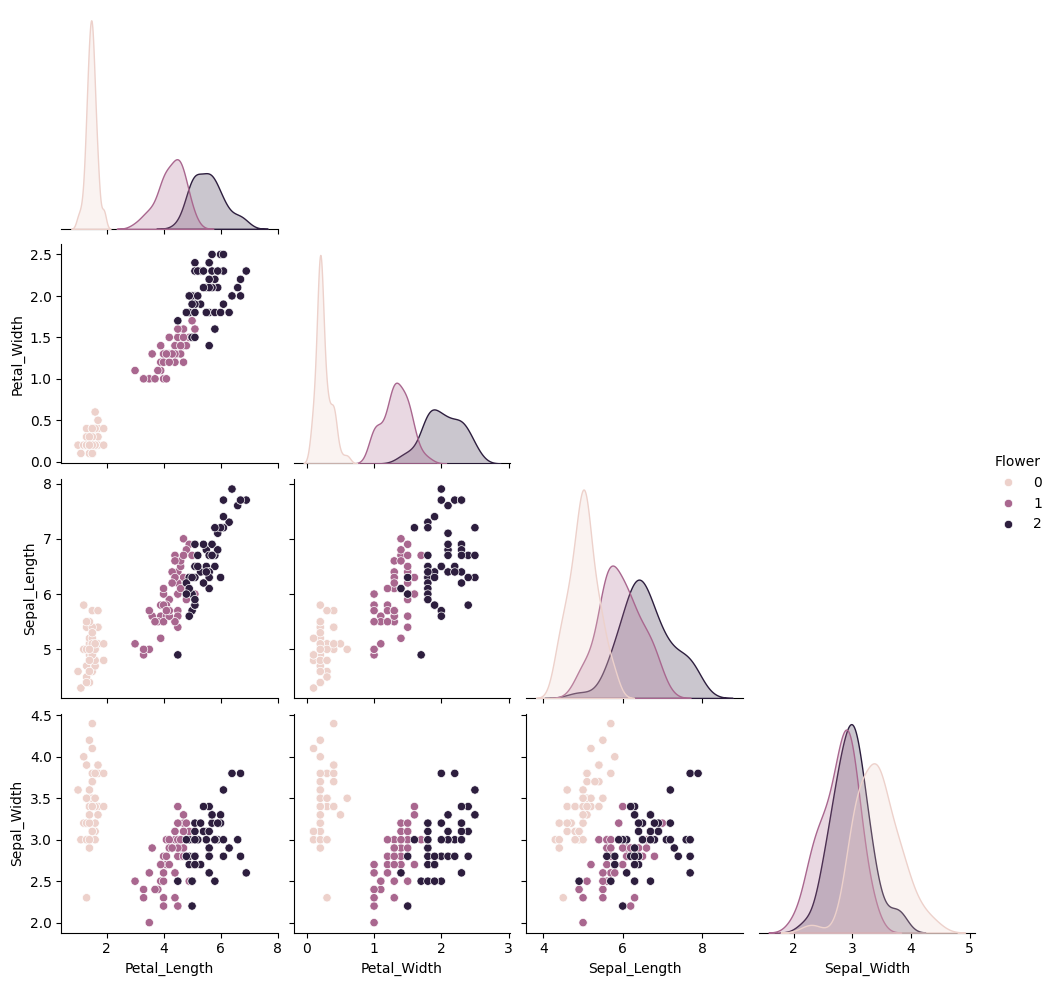

In [1023]:
# Pairplot: Scatterplot of all variables (grouped by flower type)
sns.pairplot(df, vars=["Petal_Length", "Petal_Width", "Sepal_Length", "Sepal_Width"], hue = "Flower",corner=True)

In [1024]:
# Get dataframes for each real cluster
df0_setosa= df[df['Flower'] == 0]
df1_versicolor= df[df['Flower'] == 1]
df2_virginica= df[df['Flower'] == 2]
print(df0_setosa)
print(df1_versicolor)
print(df2_virginica)

    Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  Flower
0            5.1          3.5           1.4          0.2       0
1            4.9          3.0           1.4          0.2       0
2            4.7          3.2           1.3          0.2       0
3            4.6          3.1           1.5          0.2       0
4            5.0          3.6           1.4          0.2       0
5            5.4          3.9           1.7          0.4       0
6            4.6          3.4           1.4          0.3       0
7            5.0          3.4           1.5          0.2       0
8            4.4          2.9           1.4          0.2       0
9            4.9          3.1           1.5          0.1       0
10           5.4          3.7           1.5          0.2       0
11           4.8          3.4           1.6          0.2       0
12           4.8          3.0           1.4          0.1       0
13           4.3          3.0           1.1          0.1       0
14           5.8         

<Axes: xlabel='Petal_Length', ylabel='Petal_Width'>

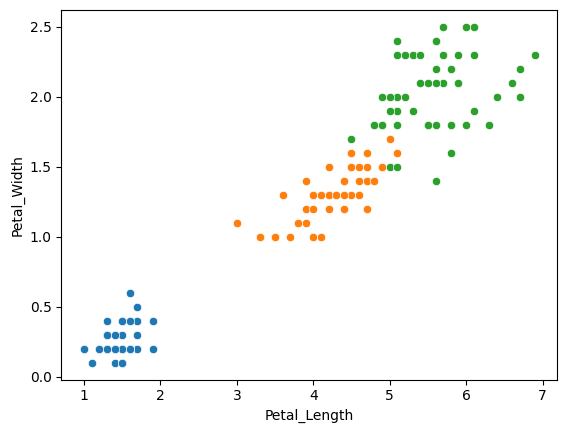

In [1025]:
# Scatter plot of each real cluster for Petal
sns.scatterplot(data=df0_setosa, x='Petal_Length', y='Petal_Width')
sns.scatterplot(data=df1_versicolor, x='Petal_Length', y='Petal_Width')
sns.scatterplot(data=df2_virginica, x='Petal_Length', y='Petal_Width')

<Axes: xlabel='Sepal_Length', ylabel='Sepal_Width'>

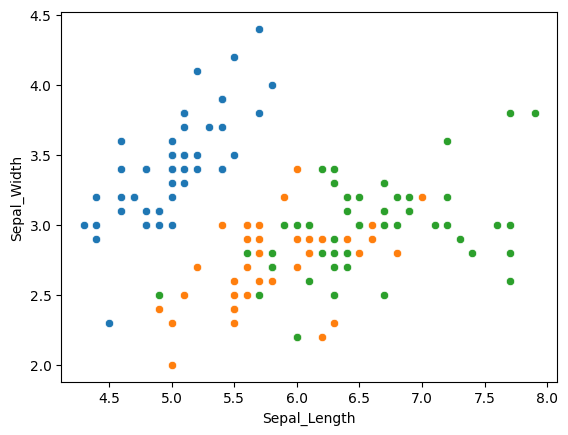

In [1026]:
# Scatter plot of each real cluster for Sepal
sns.scatterplot(data=df0_setosa, x='Sepal_Length', y='Sepal_Width')
sns.scatterplot(data=df1_versicolor, x='Sepal_Length', y='Sepal_Width')
sns.scatterplot(data=df2_virginica, x='Sepal_Length', y='Sepal_Width')

Recall that for this dataset we know in advance the class to which each point belongs to

# Get variables **X** and labels **y**

In [1027]:
# Select variables (one, two, three, four)
X  = df[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]].values
#X  = dataset[["Petal_Length", "Petal_Width"]].values
#X  = dataset[["Sepal_Length", "Sepal_Width"]].values

# Get the class of each observation
y  = df["Flower"].values


In [1028]:
# Understand the data X
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [1029]:
# Understand the data y
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [1030]:
# Calculate the number of observations in the dataset
len(df)

150

In [1031]:
# Calculate the number of observations for class 0
len(df0_setosa)

50

In [1032]:
# Calculate the number of observations for class 1
len(df1_versicolor)

50

In [1033]:
# Calculate the number of observations for class 2
len(df2_virginica)

50

# Train a classifier

## Train the classification model

In [1034]:
# Import sklearn linear_model
from sklearn.linear_model import LogisticRegression

# Initialize the classifier
logistic=LogisticRegression()

# Fit the model to the training data
logistic.fit(X,y)

LogisticRegression()

## Predict the class of a new observation

In [1035]:
# Get a new observation
xnew = np.array([[5.5, 3.5, 1.5, 0.5]])
#xnew = np.array([[5.5, 2.5, 3.5, 1.5]])
#xnew = np.array([[6.5, 3.5, 5.5, 2.5]])

# Print the new observation
xnew


array([[5.5, 3.5, 1.5, 0.5]])

In [1036]:
# Make the prediction using xnew
prediction = logistic.predict(xnew)

# Get the predicted class
prediction

array([0])

The question is, how accurate is the classification model?... we need to evaluate the performance of our classifier

# Evaluation of a classifier

## Split data in train and test sets

Holdout: spliting the dataset in train and test sets

In [1037]:
# Import sklearn train_test_split
from sklearn.model_selection import train_test_split

# Split data in train and test sets
#20% of data for testing
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [1038]:
# Number of observations in the train set
print(len(x_train))
print(len(y_train))

120
120


In [1039]:
# Number of observations of each class in the train set
print(np.sum(x_train == 0))
print(np.sum(x_train == 1))
print(np.sum(x_train == 2))
print(np.sum(y_train == 0))
print(np.sum(y_train == 1))
print(np.sum(y_train == 2))

0
8
5
40
41
39


In [1040]:
# Number of observations in the test set
print(len(x_test))
print(len(y_test))


30
30


In [1041]:
# Number of observations of each class in the test set
print(np.sum(x_test == 0))
print(np.sum(x_test == 1))
print(np.sum(x_test == 2))
print(np.sum(y_test == 0))
print(np.sum(y_test == 1))
print(np.sum(y_test == 2))

0
0
2
10
9
11


## Train the classification model

In [1042]:
# Initialize the classifier
logistic=LogisticRegression()

# Fit the model to the training data
logistic.fit(x_train, y_train)

LogisticRegression()

## Test the classification model

In [1043]:
# Make the predictions using the test set
y_predict=logistic.predict(x_test)
y_predict

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [1044]:
# Explore real and predicted labels
y_test == y_predict

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

## Compute the acurracy

In [1045]:
(y_test == y_predict).mean()

1.0

In [1046]:
# Define a function to compute accuracy
def compute_accuracy(real, predicted):
  (real == predicted).mean()

In [1047]:
# Calculate total accuracy
compute_accuracy(y_test, y_predict)


In [1048]:
# Calculate total accuracy using sklearn.metrics
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test, y_predict)
ac


1.0

In [1049]:
y_predict

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [1050]:
# Compute accuracy for class 0
ac0 = accuracy_score(y_test[y_test == 0], y_predict[y_predict == 0])
ac0

1.0

In [1051]:
# Compute accuracy for class 1
ac1 = accuracy_score(y_test[y_test == 1], y_predict[y_predict == 1])
ac1

1.0

In [1052]:
# Compute accuracy for class 2
ac2 = accuracy_score(y_test[y_test == 1], y_predict[y_predict == 1])
ac2

1.0

## Confussion matrix

In [1053]:
# Compute confussion matrix (normalized confusion matrix)
from sklearn.metrics import confusion_matrix

confusion=confusion_matrix(y_test,y_predict)
confusion_normalized = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis]

In [1054]:
print(confusion)
print(confusion_normalized)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


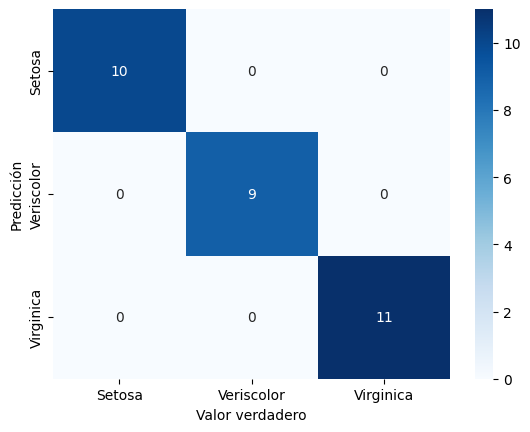

In [1055]:
# Plot normalized confussion matrix
sns.heatmap(confusion,annot=True,cmap='Blues');
etiquetas=['Setosa', 'Veriscolor', 'Virginica'] #Etiquetas en orden alfabético
lugares_etiquetas=[0.5,1.5,2.5]
plt.xticks(lugares_etiquetas,etiquetas)
plt.yticks(lugares_etiquetas,etiquetas)
plt.xlabel('Valor verdadero')
plt.ylabel('Predicción');

# Evaluation of a classifier

## Split data in train and test sets

Holdout: spliting the dataset in train and test sets

In [1056]:
# Import sklearn train_test_split
from sklearn.tree import DecisionTreeClassifier

# Split data in train and test sets
#20% of data for testing
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [1057]:
# Number of observations in the train set
print(len(x_train))
print(len(y_train))

120
120


In [1058]:
# Number of observations of each class in the train set
print(np.sum(x_train == 0))
print(np.sum(x_train == 1))
print(np.sum(x_train == 2))
print(np.sum(y_train == 0))
print(np.sum(y_train == 1))
print(np.sum(y_train == 2))

0
8
5
40
41
39


In [1059]:
# Number of observations in the test set
print(len(x_test))
print(len(y_test))


30
30


In [1060]:
# Number of observations of each class in the test set
print(np.sum(x_test == 0))
print(np.sum(x_test == 1))
print(np.sum(x_test == 2))
print(np.sum(y_test == 0))
print(np.sum(y_test == 1))
print(np.sum(y_test == 2))

0
0
2
10
9
11


## Train the classification model

In [1061]:
# Initialize the classifier
logistic=LogisticRegression()
tree=DecisionTreeClassifier()

# Fit the model to the training data
tree.fit(x_train,y_train)

DecisionTreeClassifier()

## Test the classification model

In [1062]:
# Make the predictions using the test set
y_predict=tree.predict(x_test)
y_predict

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [1063]:
# Explore real and predicted labels
y_test == y_predict

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

## Compute the acurracy

In [1064]:
(y_test == y_predict).mean()

1.0

In [1065]:
# Define a function to compute accuracy
def compute_accuracy(real, predicted):
  (real == predicted).mean()

In [1066]:
# Calculate total accuracy
compute_accuracy(y_test, y_predict)


In [1067]:
# Calculate total accuracy using sklearn.metrics
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test, y_predict)
ac


1.0

In [1068]:
y_predict

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [1069]:
# Compute accuracy for class 0
ac0 = accuracy_score(y_test[y_test == 0], y_predict[y_predict == 0])
ac0

1.0

In [1070]:
# Compute accuracy for class 1
ac1 = accuracy_score(y_test[y_test == 1], y_predict[y_predict == 1])
ac1

1.0

In [1071]:
# Compute accuracy for class 2
ac2 = accuracy_score(y_test[y_test == 1], y_predict[y_predict == 1])
ac2

1.0

## Confussion matrix

In [1072]:
# Compute confussion matrix (normalized confusion matrix)
from sklearn.metrics import confusion_matrix

confusion=confusion_matrix(y_test,y_predict)
confusion_normalized = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis]

In [1073]:
print(confusion)
print(confusion_normalized)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


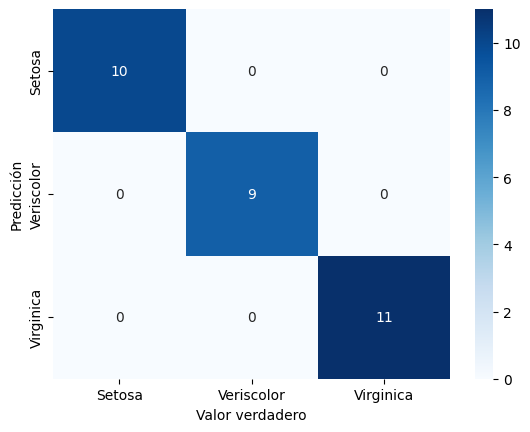

In [1074]:
# Plot normalized confussion matrix
sns.heatmap(confusion,annot=True,cmap='Blues');
etiquetas=['Setosa', 'Veriscolor', 'Virginica'] #Etiquetas en orden alfabético
lugares_etiquetas=[0.5,1.5,2.5]
plt.xticks(lugares_etiquetas,etiquetas)
plt.yticks(lugares_etiquetas,etiquetas)
plt.xlabel('Valor verdadero')
plt.ylabel('Predicción');

# Get variables **X** and labels **y**

In [1075]:
# Select variables (one, two, three, four)
#X  = df[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]].values
X  = dataset[["Petal_Length", "Petal_Width"]].values
#X  = dataset[["Sepal_Length", "Sepal_Width"]].values

# Get the class of each observation
y  = df["Flower"].values


In [1076]:
# Understand the data X
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.5, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [1077]:
# Understand the data y
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [1078]:
# Calculate the number of observations in the dataset
len(df)

150

In [1079]:
# Calculate the number of observations for class 0
len(df0_setosa)

50

In [1080]:
# Calculate the number of observations for class 1
len(df1_versicolor)

50

In [1081]:
# Calculate the number of observations for class 2
len(df2_virginica)

50

# Train a classifier

## Train the classification model

In [1082]:
# Import sklearn linear_model
from sklearn.linear_model import LogisticRegression

# Initialize the classifier
logistic=LogisticRegression()

# Fit the model to the training data
logistic.fit(X,y)

LogisticRegression()

## Predict the class of a new observation

In [1083]:
# Get a new observation
#xnew = np.array([[5.5, 3.5, 1.5, 0.5]])
xnew = np.array([[5.5, 2.5]])
#xnew = np.array([[6.5, 3.5, 5.5, 2.5]])

# Print the new observation
xnew


array([[5.5, 2.5]])

In [1084]:
# Make the prediction using xnew
prediction = logistic.predict(xnew)

# Get the predicted class
prediction

array([2])

The question is, how accurate is the classification model?... we need to evaluate the performance of our classifier

# Evaluation of a classifier

## Split data in train and test sets

Holdout: spliting the dataset in train and test sets

In [1085]:
# Import sklearn train_test_split
from sklearn.model_selection import train_test_split

# Split data in train and test sets
#20% of data for testing
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [1086]:
# Number of observations in the train set
print(len(x_train))
print(len(y_train))

120
120


In [1087]:
# Number of observations of each class in the train set
print(np.sum(x_train == 0))
print(np.sum(x_train == 1))
print(np.sum(x_train == 2))
print(np.sum(y_train == 0))
print(np.sum(y_train == 1))
print(np.sum(y_train == 2))

0
8
4
40
41
39


In [1088]:
# Number of observations in the test set
print(len(x_test))
print(len(y_test))


30
30


In [1089]:
# Number of observations of each class in the test set
print(np.sum(x_test == 0))
print(np.sum(x_test == 1))
print(np.sum(x_test == 2))
print(np.sum(y_test == 0))
print(np.sum(y_test == 1))
print(np.sum(y_test == 2))

0
0
2
10
9
11


## Train the classification model

In [1090]:
# Initialize the classifier
logistic=LogisticRegression()

# Fit the model to the training data
logistic.fit(x_train, y_train)

LogisticRegression()

## Test the classification model

In [1091]:
# Make the predictions using the test set
y_predict=logistic.predict(x_test)
y_predict

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [1092]:
# Explore real and predicted labels
y_test == y_predict

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

## Compute the acurracy

In [1093]:
(y_test == y_predict).mean()

1.0

In [1094]:
# Define a function to compute accuracy
def compute_accuracy(real, predicted):
  (real == predicted).mean()

In [1095]:
# Calculate total accuracy
compute_accuracy(y_test, y_predict)


In [1096]:
# Calculate total accuracy using sklearn.metrics
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test, y_predict)
ac


1.0

In [1097]:
y_predict

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [1098]:
# Compute accuracy for class 0
ac0 = accuracy_score(y_test[y_test == 0], y_predict[y_predict == 0])
ac0

1.0

In [1099]:
# Compute accuracy for class 1
ac1 = accuracy_score(y_test[y_test == 1], y_predict[y_predict == 1])
ac1

1.0

In [1100]:
# Compute accuracy for class 2
ac2 = accuracy_score(y_test[y_test == 1], y_predict[y_predict == 1])
ac2

1.0

## Confussion matrix

In [1101]:
# Compute confussion matrix (normalized confusion matrix)
from sklearn.metrics import confusion_matrix

confusion=confusion_matrix(y_test,y_predict)
confusion_normalized = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis]

In [1102]:
print(confusion)
print(confusion_normalized)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


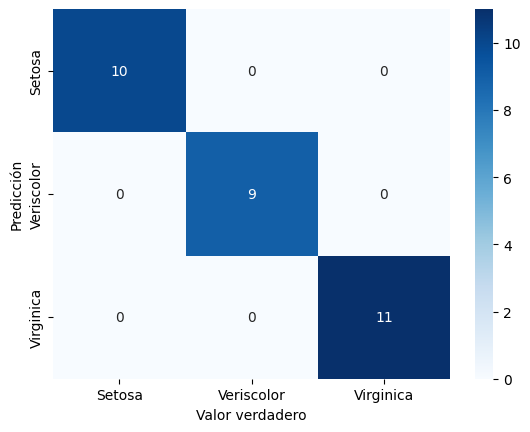

In [1103]:
# Plot normalized confussion matrix
sns.heatmap(confusion,annot=True,cmap='Blues');
etiquetas=['Setosa', 'Veriscolor', 'Virginica'] #Etiquetas en orden alfabético
lugares_etiquetas=[0.5,1.5,2.5]
plt.xticks(lugares_etiquetas,etiquetas)
plt.yticks(lugares_etiquetas,etiquetas)
plt.xlabel('Valor verdadero')
plt.ylabel('Predicción');

# Get variables **X** and labels **y**

In [1104]:
# Select variables (one, two, three, four)
#X  = df[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]].values
#X  = dataset[["Petal_Length", "Petal_Width"]].values
X  = dataset[["Sepal_Length", "Sepal_Width"]].values

# Get the class of each observation
y  = df["Flower"].values


In [1105]:
# Understand the data X
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.1],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [1106]:
# Understand the data y
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [1107]:
# Calculate the number of observations in the dataset
len(df)

150

In [1108]:
# Calculate the number of observations for class 0
len(df0_setosa)

50

In [1109]:
# Calculate the number of observations for class 1
len(df1_versicolor)

50

In [1110]:
# Calculate the number of observations for class 2
len(df2_virginica)

50

# Train a classifier

## Train the classification model

In [1111]:
# Import sklearn linear_model
from sklearn.linear_model import LogisticRegression

# Initialize the classifier
logistic=LogisticRegression()

# Fit the model to the training data
logistic.fit(X,y)

LogisticRegression()

## Predict the class of a new observation

In [1112]:
# Get a new observation
#xnew = np.array([[5.5, 3.5, 1.5, 0.5]])
#xnew = np.array([[5.5, 2.5, 3.5, 1.5]])
xnew = np.array([[6.5, 3.5]])

# Print the new observation
xnew


array([[6.5, 3.5]])

In [1113]:
# Make the prediction using xnew
prediction = logistic.predict(xnew)

# Get the predicted class
prediction

array([2])

The question is, how accurate is the classification model?... we need to evaluate the performance of our classifier

# Evaluation of a classifier

## Split data in train and test sets

Holdout: spliting the dataset in train and test sets

In [1114]:
# Import sklearn train_test_split
from sklearn.model_selection import train_test_split

# Split data in train and test sets
#20% of data for testing
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [1115]:
# Number of observations in the train set
print(len(x_train))
print(len(y_train))

120
120


In [1116]:
# Number of observations of each class in the train set
print(np.sum(x_train == 0))
print(np.sum(x_train == 1))
print(np.sum(x_train == 2))
print(np.sum(y_train == 0))
print(np.sum(y_train == 1))
print(np.sum(y_train == 2))

0
0
1
40
41
39


In [1117]:
# Number of observations in the test set
print(len(x_test))
print(len(y_test))


30
30


In [1118]:
# Number of observations of each class in the test set
print(np.sum(x_test == 0))
print(np.sum(x_test == 1))
print(np.sum(x_test == 2))
print(np.sum(y_test == 0))
print(np.sum(y_test == 1))
print(np.sum(y_test == 2))

0
0
0
10
9
11


## Train the classification model

In [1119]:
# Initialize the classifier
logistic=LogisticRegression()

# Fit the model to the training data
logistic.fit(x_train, y_train)

LogisticRegression()

## Test the classification model

In [1120]:
# Make the predictions using the test set
y_predict=logistic.predict(x_test)
y_predict

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0])

In [1121]:
# Explore real and predicted labels
y_test == y_predict

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True])

## Compute the acurracy

In [1122]:
(y_test == y_predict).mean()

0.9

In [1123]:
# Define a function to compute accuracy
def compute_accuracy(real, predicted):
  (real == predicted).mean()

In [1124]:
# Calculate total accuracy
compute_accuracy(y_test, y_predict)


In [1125]:
# Calculate total accuracy using sklearn.metrics
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test, y_predict)
ac


0.9

In [1126]:
y_predict

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0])

In [1127]:
# Compute accuracy for class 0
ac0 = accuracy_score(y_test[y_test == 0], y_predict[y_predict == 0])
ac0

1.0

In [1128]:
# Compute accuracy for class 1
ac1 = accuracy_score(y_test[np.where(y_test == 1)], y_predict[np.where(y_test == 1)])
ac1

0.7777777777777778

In [1129]:
# Compute accuracy for class 2
ac2 = accuracy_score(y_test[np.where(y_test == 2)], y_predict[np.where(y_test == 2)])
ac2

0.9090909090909091

## Confussion matrix

In [1130]:
# Compute confussion matrix (normalized confusion matrix)
from sklearn.metrics import confusion_matrix

confusion=confusion_matrix(y_test,y_predict)
confusion_normalized = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis]

In [1131]:
print(confusion)
print(confusion_normalized)

[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]
[[1.         0.         0.        ]
 [0.         0.77777778 0.22222222]
 [0.         0.09090909 0.90909091]]


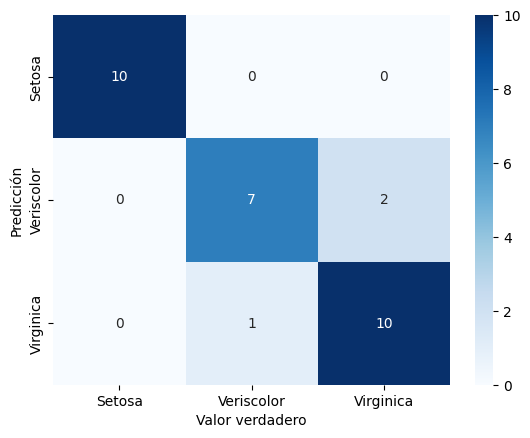

In [1132]:
# Plot normalized confussion matrix
sns.heatmap(confusion,annot=True,cmap='Blues');
etiquetas=['Setosa', 'Veriscolor', 'Virginica'] #Etiquetas en orden alfabético
lugares_etiquetas=[0.5,1.5,2.5]
plt.xticks(lugares_etiquetas,etiquetas)
plt.yticks(lugares_etiquetas,etiquetas)
plt.xlabel('Valor verdadero')
plt.ylabel('Predicción');

# Final remarks

- Evaluation of classification model is critical

- Train and test set have to be mutually exclusive

- There are several alternatives: Holdout, Montecarlo, k-fold, repeated k-fold, Leave P Out (LPO), Leave One Out (LOO), Stratified k-fold

- https://scikit-learn.org/stable/modules/cross_validation.html

# Activity

1) Compare the accuracy of the classification using (a) the four variables, (b) the two Petal variables, and (c) the two Sepal variables. Which provides the best classification accuracy?


2) Using the four variables, try with two classifiers. Which provides the best performance?

1. Which provides the best classification accuracy?
a and b provide 100% accuracy, c does not.
a and b are the best models.

2. The two classifiers - Logistic Regression and Decision Tree - have 100% accuracy in their results, meaning they both provide the best accuracy.